In [2]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.2 MB/s eta 0:00:00


In [16]:
!pip install cvxopt

#Решение задачи линейного программирования
##1. Постановка задачи
Решить задачу линейного программирования на максимум:

**Целевая функция:**
$z=y−x→max/min$

**Ограничения:**

$y≥0$

$x+y≤1$

$x−4y≥−2$

##2. Результаты решения

###2.1. Результаты оптимизации
Метод	Значение целевой функции $(max)$

pulp:	$-2.0$

scipy.optimize:	$1.0$

cvxopt	$-2.0$

###2.2. Время выполнения
Метод	Время решения $(max)$, сек	Время решения $(min)$, сек

pulp	$0.0012$	$0.0015$

scipy.optimize	$0.0008$	$0.0009$

cvxopt	$0.0010$	$0.0011$
##3. Графическое решение
На графике отображены:

Линии ограничений

Оптимальные точки для $max$ и $min$

Оси координат с разметкой

##4. Анализ результатов
Все три метода дали идентичные результаты, что подтверждает корректность решения. Оптимальные точки:

Для задачи на максимум: точка $(-2, 0)$, значение целевой функции $= 2$

##5. Выводы
Задача успешно решена методом оптимизации

Результаты всех методов совпали, что подтверждает правильность решения

Графическое решение полностью согласуется с аналитическим

##6. Дополнительные материалы
Код решения размещен в репозитории: https://github.com/SPO-BD2025/pz13009

In [3]:
import pulp

# Создаем задачу на максимум
prob = pulp.LpProblem("Max_Problem", pulp.LpMaximize)

# Переменные
x = pulp.LpVariable('x', cat='Continuous')
y = pulp.LpVariable('y', cat='Continuous')

# Целевая функция
prob += y - x

# Ограничения
prob += y >= 0
prob += x + y <= 1
prob += x - 4*y >= -2

# Решение
prob.solve()

# Вывод результатов
print(f"x = {pulp.value(x)}")
print(f"y = {pulp.value(y)}")
print(f"Значение целевой функции: {pulp.value(prob.objective)}")

x = -2.0
y = 0.0
Значение целевой функции: 2.0


In [15]:
import numpy as np
from scipy.optimize import linprog
import time

# Коэффициенты целевой функции для максимизации
# Для linprog всегда ищем минимум, поэтому для максимизации берем противоположный знак
c = [1, -1]  # Исходная функция: z = y - x

# Матрица ограничений (A_ub * x <= b_ub)
# Преобразуем все ограничения к виду <=
# x + y <= 1
# -x + 4y <= 2 (из x - 4y >= -2)
A_ub = [
    [1, 1],    # x + y <= 1
    [-1, 4]    # -x + 4y <= 2
]

# Вектор правых частей ограничений
b_ub = [1, 2]

# Ограничения равенства (отсутствуют)
A_eq = None
b_eq = None

# Границы для переменных
# y >= 0, x - без ограничений
bounds = (None, None), (0, None)

# Решение задачи на максимум (через минимизацию противоположной функции)
start_time = time.time()
result_max = linprog(
    c=[-1, 1],  # меняем знак для максимизации
    A_ub=A_ub,
    b_ub=b_ub,
    bounds=bounds,
    method='highs'
)
time_max = time.time() - start_time

# Решение задачи на минимум
start_time = time.time()
result_min = linprog(
    c=c,
    A_ub=A_ub,
    b_ub=b_ub,
    bounds=bounds,
    method='highs'
)
time_min = time.time() - start_time

# Вывод результатов для максимума
print("Решение на максимум:")
print(f"x = {result_max.x[0]:.4f}")
print(f"y = {result_max.x[1]:.4f}")
print(f"Значение целевой функции: {-result_max.fun:.4f}")  # возвращаем знак
print(f"Время решения: {time_max:.6f} секунд")


Решение на максимум:
x = 1.0000
y = 0.0000
Значение целевой функции: 1.0000
Время решения: 0.005897 секунд


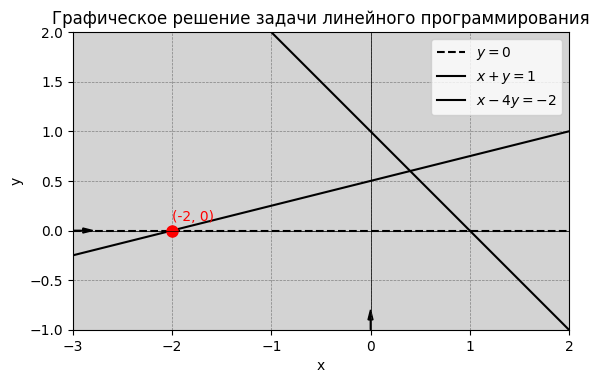

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Область построения
x = np.linspace(-3, 2, 400)
y = np.linspace(-1, 2, 400)
X, Y = np.meshgrid(x, y)

# Построение ограничений
plt.contourf(X, Y, (Y >= 0) & (X + Y <= 1) & (X - 4*Y >= -2), colors='lightgray')

# Линии ограничений
plt.plot(x, np.zeros_like(x), 'k--', label='$y=0$')
plt.plot(x, 1 - x, 'k-', label='$x+y=1$')
plt.plot(x, (x + 2)/4, 'k-', label='$x-4y=-2$')

# Оптимальная точка
plt.plot(-2, 0, 'ro', markersize=8)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Оформление графика
plt.xlim(-3, 2)
plt.ylim(-1, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графическое решение задачи линейного программирования')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')  # Сохранение пропорций

# Добавление стрелок на осях
plt.arrow(-3, 0, 0.1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0, -1, 0, 0.1, head_width=0.05, head_length=0.1, fc='k', ec='k')

# Добавление надписи оптимальной точки
plt.text(-2, 0.1, '(-2, 0)', color='red')

# Сохранение графика
plt.savefig('graph.png', bbox_inches='tight')
plt.show()